# QUONTO

* To make sure the company stays profitable, they need to have an average default rate below 8.5%.
* We've gathered data on different loans
* Your goal is to test whether the algorithm respects the maximum default loan rate.

## Step 1 - Import libraries

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Import Dataset

In [306]:
df = pd.read_csv("./assets/Python/qonto_loans.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,182940,0,Cash loans,F,N,N,0,90000.0,835380.0,23571.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689
1,397049,1,Cash loans,M,Y,Y,0,225000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029
2,120845,1,Cash loans,M,Y,Y,3,135000.0,755190.0,38686.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164
3,155211,0,Revolving loans,M,N,N,2,180000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007305
4,172542,0,Cash loans,M,N,Y,0,270000.0,781920.0,33129.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007330


## Step 3 - EDA (Exploratory Data Analysis)

In [307]:
df.describe(include="all")                    # Voir le include="all"

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
count,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000,1.000000e+04,1.000000e+04,9999.000000,9.997000e+03,9965,10000,10000,10000,10000,10000.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,6,5,5,6,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN
freq,NaN,NaN,9073,6642,6610,6884,NaN,NaN,NaN,NaN,NaN,8158,5129,6968,6327,8847,NaN
mean,278434.555600,0.077500,NaN,NaN,NaN,NaN,0.419200,1.677800e+05,6.034761e+05,26909.101710,5.414610e+05,NaN,NaN,NaN,NaN,NaN,0.021051
std,103005.459546,0.267397,NaN,NaN,NaN,NaN,0.747213,9.376608e+04,4.015770e+05,14132.620434,3.679354e+05,NaN,NaN,NaN,NaN,NaN,0.014012
min,100077.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.500000e+04,NaN,NaN,NaN,NaN,NaN,0.000533
25%,187556.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.762775e+05,16551.000000,2.385000e+05,NaN,NaN,NaN,NaN,NaN,0.010032
50%,279763.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.485000e+05,5.212800e+05,24822.000000,4.500000e+05,NaN,NaN,NaN,NaN,NaN,0.018850
75%,367411.750000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.100000e+05,34049.250000,6.795000e+05,NaN,NaN,NaN,NaN,NaN,0.028663


## Step 4 - Define hypothesises

In [308]:
H1 = "Le taux de défaut est <  8.5%"
H0 = "La taux de défaut est >= 8.5 %"

## Step 5 - Calculate Z-score

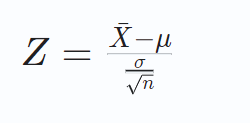

In [309]:
# Calculate Z-Score
# Z = (X-µ)/s/sqrt(n)

X = df.TARGET.mean()               # Voir la notation df.TARGET au lieu de df["TARGET"]
mu = 8.5 / 100.0
s = df.TARGET.std()
n = len(df) 
Z = (X - mu) / (s / n** 0.5)

# print(Z)
print(f"La valeur de z est : {Z:.3f}")

La valeur de z est : -2.805


## Step 6 - Set $\alpha$

In [310]:
alpha = 0.05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

In [311]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(df.TARGET, alternative="smaller", value=mu)
# print(p_value)
print(f"La p-value calculée avec ztest() est : {p_value:.4f}") 


# from scipy.stats import norm
# X = norm(mu, (df.TARGET.std() / len(df) ** 0.5))
# # Cumulative Distribution Function (CDF) 
# p_value2 = X.cdf(df.TARGET.mean())  
# # print(p_value2) 
# print(f"La p-value calculée avec cdf() est   : {p_value:.4f}") 



# Compare p-value to confidence level
# Conclude (ou pas)
if p_value < alpha:
  print("HO est rejetée donc H1 est acceptée")
  print(f"Pour rappel H1 = {H1}")
else:
  print("H0 ne peut pas être rejetée. On ne peut pas conclure")
  print(f"Pour rappel H0 = {H0}")

La p-value calculée avec ztest() est : 0.0025
HO est rejetée donc H1 est acceptée
Pour rappel H1 = Le taux de défaut est <  8.5%


## Step 8 (Optional) - Visualize probability

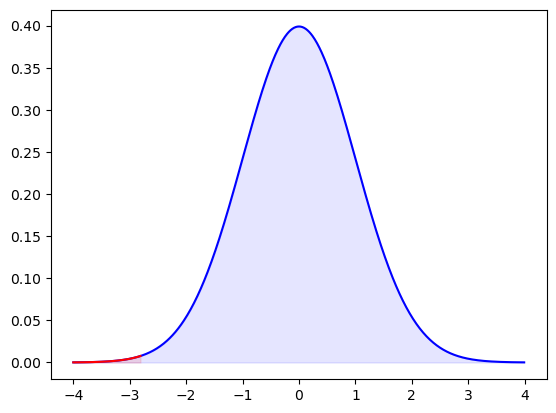

In [312]:
from scipy.stats import norm

# Génère des valeurs entre -4 et 4 espacées de .01
x_values = np.arange(-4, 4, 0.01)

# Génère les valeurs d'une gaussienne dont la moyenne est à 0 et l'écart type vaut 1 
# pour l'ensemble des x_values
mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)        # pdf = Probability density function 

# Crée une figure et un jeu d'axes
fig, ax = plt.subplots()
# Affiche y en fonction de x
ax.plot(x_values, y_values, color="blue", alpha=1.00)
# Rempli sous la courbe
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

# En fonction du z_score
if z_score < 0:
    # Crée un jeu de x entre -4 et z
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    # ou entre z et 4
    x_values2 = np.arange(z_score, 4, 0.01)

# Génère les valeurs d'une gaussienne dont la moyenne est à 0 et l'écart type vaut 1 
# pour l'ensemble des x_values2
y_values2 = norm.pdf(x_values2, mean_target, std_target)
# Affiche y_values2 en fonction de x_values2
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
# Rempli sous la courbe 
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

# SWILE

* Swile provided you with some data about sales before the marketing campaign. 
* Our goal will be to check whether this marketing campaign was a genius idea or a huge failure so that the company could replicate it abroad.
* This dataset describes the number of calls on the same day in France and abroad. 
* **The only difference** between these two samples is the impact of Marketing campaign.
* Test whether **the average number of calls in France is actually higher** than the ones abroad.

## Step 1 - Import libraries

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

## Step 2 - Import Dataset

In [314]:
df = pd.read_csv("./assets/Python/swile_sales_calls.csv")
df.head()

,calls_abroad,calls_in_France
0,4,6
1,4,2
2,4,9
3,9,9
4,2,9


## Step 3 - EDA (Exploratory Data Analysis)

Appels           : 5.500
Appels en France : 5.786


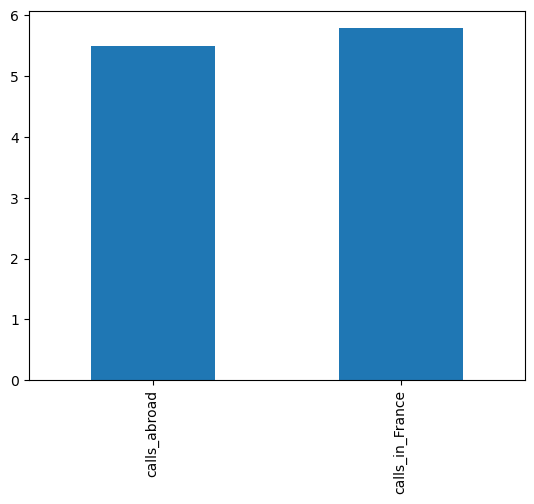

In [315]:
print(f"Appels           : {df.calls_abroad.mean():.3f}")
print(f"Appels en France : {df.calls_in_France.mean():.3f}")

Means = df.mean()
_ = Means.plot(kind="bar")

## Step 4 - Define hypothesises

In [316]:
H1 = "La moyenne du nb d'appels en France est supérieure à celle des autres pays"
H0 = "La moyenne du nb d'appels en France est inférieure ou égale à celle des autres pays"

## Step 5 - Calculate Z-score

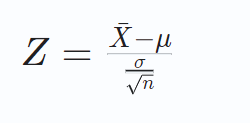

In [317]:
# Méthode 1
sample_average = df.mean()["calls_in_France"]
sample_std = df.std()["calls_in_France"]
mu = df.mean()["calls_abroad"]
n = len(df)
z_score = (sample_average - mu) / (sample_std / np.sqrt(n))
print("Méthode 1 : z_score  = ", z_score)
print("")

# Méthode 2
MoyFR = df.calls_in_France.mean() # Voir la notation df.calls_in_France au lieu de df["calls_in_France"]
MoyAbroad = df.calls_abroad.mean()       
s = df.calls_in_France.std()
n = len(df)
z_score = (MoyFR - MoyAbroad) / (s / (n**0.5))
print("Méthode 2 : z_score  = ", z_score)
print("")


# Méthode 3
z_score, p_value = ztest(df["calls_in_France"], value=MoyAbroad, alternative="larger")
print("Méthode 3 : z_score  = ", z_score)
print(f"Méthode 3 : p_value  =  {p_value:.4f}")
print("")

# Méthode 4
n = len(df)
X = norm(df.calls_in_France.mean(), (df.calls_in_France.std() / (n ** 0.5)))
p_value = X.cdf(df["calls_abroad"].mean()) # cdf => Cumulative Distribution Function
print(f"Méthode 4 : p_value  =  {p_value:.4f}")


Méthode 1 : z_score  =  1.1664524375772458

Méthode 2 : z_score  =  1.1664524375772458

Méthode 3 : z_score  =  1.1664524375772454
Méthode 3 : p_value  =  0.1217

Méthode 4 : p_value  =  0.1217


## Step 6 - Set $\alpha$

In [318]:
alpha = 0.1

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

In [319]:
if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")

H0 ne peut pas être rejetée. On ne peut pas conclure
Pour rappel H0 = La moyenne du nb d'appels en France est inférieure ou égale à celle des autres pays


## Step 8 (Optional) - Visualize probability

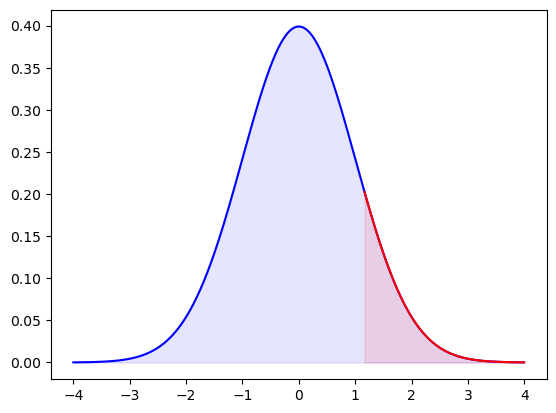

In [320]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
# Probability density function 
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

C:\Users\phili\AppData\Local\Temp\ipykernel_28176\3330284452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None)
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

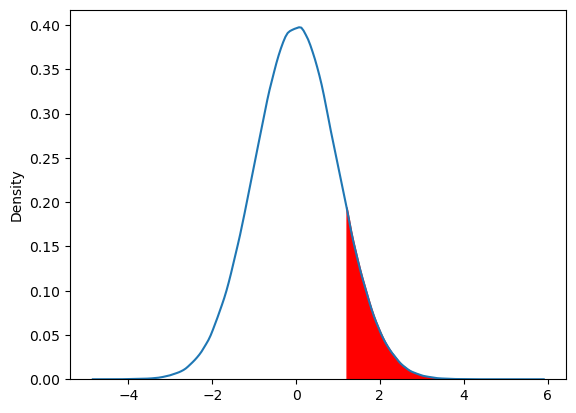

In [321]:
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()

# Spendesk 
* Spendesk really would like to prove is that their platform save at least **26 days** of work to their customers

## Step 1 - Import libraries

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

## Step 2 - Import Dataset

In [323]:
df = pd.read_csv("./assets/Python/spendesk_survey.csv")
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after
0,11,75
1,13,72
2,38,15
3,28,34
4,39,17


## Step 3 - EDA (Exploratory Data Analysis)

65.73
41.03


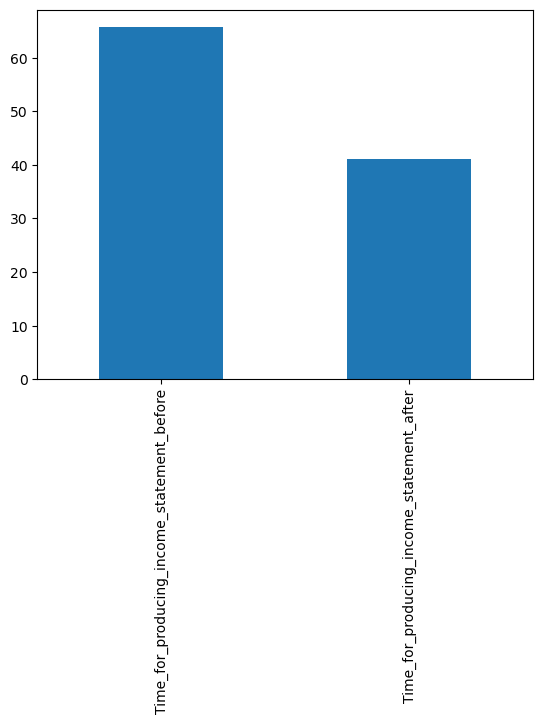

In [324]:
MeanBefore = df.Time_for_producing_income_statement_before.mean()
MeanAfter = df.Time_for_producing_income_statement_after.mean()

print(f"{MeanBefore:.2f}")
print(f"{MeanAfter:.2f}")

Means = df.mean()
_ = Means.plot(kind="bar")

In [325]:
boost = (MeanBefore - MeanAfter) / MeanBefore
boost

0.3758430783898091

In [326]:
# On crée une nouvelle colonne "time_diff" dans le data frame 
# La coloone contient les différences entre after et before
df["time_diff"] = ( df["Time_for_producing_income_statement_before"] - df["Time_for_producing_income_statement_after"])
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after,time_diff
0,11,75,-64
1,13,72,-59
2,38,15,23
3,28,34,-6
4,39,17,22


## Step 4 - Define hypothesises

In [327]:
H1 = "the platform saves at least 26 days of work"
H0 = "the platform save less than 26 days of work"

## Step 5 - Calculate Z-score

In [328]:
sample_mean = df.time_diff.mean()
sample_std = df.time_diff.std()
n = len(df)
z_score = (sample_mean - 26) / (sample_std / n**0.5)
z_score

-1.321211217800986

## Step 6 - Set $\alpha$

In [329]:
alpha = 10 / 100

## Step 7 - Calculate p_value

In [330]:
# Z! df["calls_in_France"] les valeurs de l'échantillons
z_score, p_value = ztest(df.time_diff, value=26, alternative="smaller")
print(f"z_score  = {z_score:.02f}")
print(f"p_value  =  {p_value:.02f}")

# X est une distribution normale de moyenne = 26 et sigma = s/sqrt(n)
X = norm(26, (df.time_diff.std() / len(df) ** 0.5))
p_value2 = X.cdf(df.time_diff.mean()) # cdf => Cumulative Distribution Function   
print(f"p_value  =  {p_value2:.02f}")
print("")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")

z_score  = -1.32
p_value  =  0.09
p_value  =  0.09

HO est rejetée donc H1 est acceptée
Pour rappel H1 = the platform saves at least 26 days of work


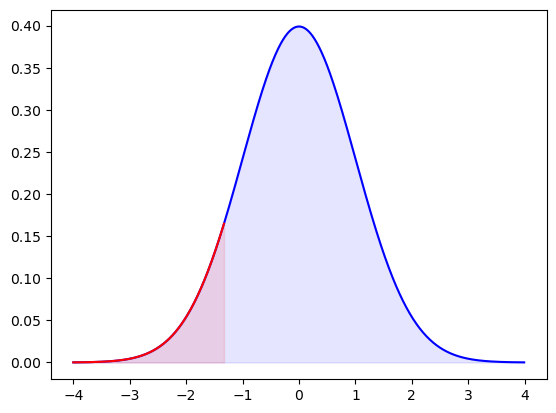

In [331]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

# Vinted
They asked you to run an A/B test to determine which version would provide **more conversions**.

## Step 1 - Import Libraries

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Import dataset

In [333]:
df = pd.read_csv("./assets/Python/vinted_website_optimization.csv")
df.head()

,Feature_A,Feature_B
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


## Step 3 - EDA (Exploratory Data Analysis)
Let's first see the proportion of conversion for Feature A as well as Feature B


In [334]:
convert_A = df.Feature_A.sum()
convert_A = convert_A/len(df)
print(f"Taux de conversion A : {convert_A}")
print(f"Taux de conversion A : {df.Feature_A.mean()}\n")        # équivalent aux 3 lignes précédentes

print(f"Taux de conversion B : {df.Feature_B.mean()}")       

Taux de conversion A : 0.086
Taux de conversion A : 0.086

Taux de conversion B : 0.126


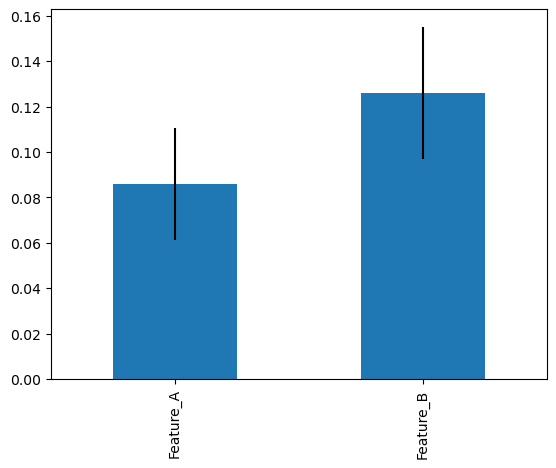

In [335]:
# Construction de l'intervale de confiance
# ©️ Asma 😊
# Le cahier des charges dit intervalle de confiance 95%, donc t = 1.96
t = 1.96
n = len(df)
err = t * df.std() / n**0.5

# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars
_ = df.mean().plot(kind="bar", yerr=err)

## Step 4 - Define hypothesis

In [336]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "The conversions rate are differents"
H0 = "The conversions rate are equal"

## Step 5 - Calculate Z-score

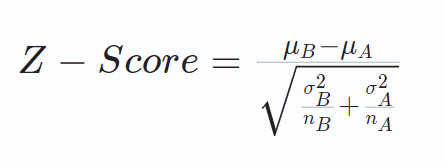

In [337]:
muA = df.Feature_A.mean()
muB = df.Feature_B.mean()

sigmaA = df.Feature_A.std()
sigmaB = df.Feature_B.std()

n = len(df)

denom = sigmaB**2/n + sigmaA**2/n
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.03f}\n")

z_score  = 2.057



## Step 6 - Set $\alpha$

Confidence level = 95%

In [338]:
alpha = .05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

Voir : https://www.statology.org/z-test-python/

In [339]:
# Bien voir le signe de z_score et la valeur de p_value
# On veut tester si A est significativement plus petit que B
z_score, p_value = ztest(df.Feature_A, df.Feature_B, value = 0, alternative="smaller")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

# Voir qu'on a inversé Feature_B et A dans l'appel à ztest
z_score, p_value = ztest(df.Feature_B, df.Feature_A, value = 0, alternative="larger")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")


z_score  = -2.0568
p_value  = 0.0199

z_score  = 2.0568
p_value  = 0.0199

HO est rejetée donc H1 est acceptée
Pour rappel H1 = The conversions rate are differents


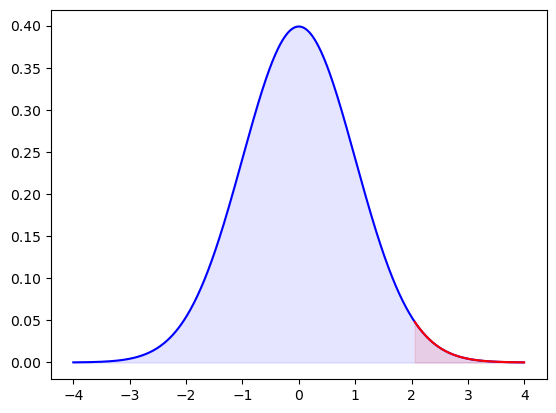

In [340]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

# airbnb
During the olympics, the Data and Design team were hesitating between two background images for the website that you can see below

* Now Airbnb performed an A/B test
* A random sample of their users got to see the website with feature A and another part got to see feature B.
* The results are listed in airbnb_cover_test.xlsx. 
* Perform an hypothesis test proving that one feature is really better than the other one.

## Step 1 - Import Libraries

In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Import dataset

In [342]:
df = pd.read_excel("./assets/Python/airbnb_cover_test.xlsx")
df.head()

,Feature,Converted
0,B,0
1,B,0
2,B,0
3,B,0
4,B,0


## Step 3 - EDA (Exploratory Data Analysis)
 Proportion of conversion for Feature A & B


In [343]:
# Méthode 1
df.groupby("Feature").mean()



,Converted
Feature,
A,0.088604
B,0.096856


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\phili\AppData\Local\Temp\ipykernel_28176\316591848.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x="Feature", y="Conv

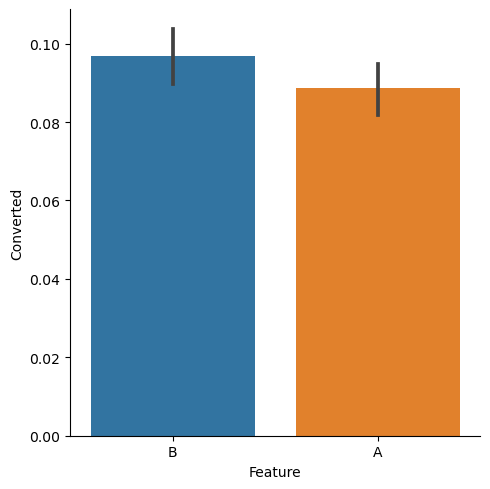

In [344]:
sns.catplot(x="Feature", y="Converted", data=df, kind="bar", ci=95)


# Construction de l'intervale de confiance
# ©️ Asma 😊
# Le cahier des charges dit intervalle de confiance 95%, donc t = 1.96
# t = 1.96
# n = len(df)
# err = t * df.std() / n**0.5
# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars
#_ = df.plot(kind="bar", yerr=err)



## Step 4 - Define hypothesis

In [345]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "One feature is really better than the other"
H0 = "Both feateures are equivalent"

## Step 5 - Calculate Z-score

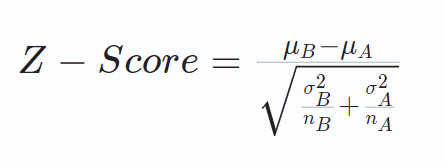

In [346]:
Feature_A = df[df["Feature"]=="A"]
Feature_B = df[df["Feature"]=="B"]

muA = Feature_A.Converted.mean()
muB = Feature_B.Converted.mean()

sigmaA = Feature_A.Converted.std()
sigmaB = Feature_B.Converted.std()

nA = len(Feature_A)
nB = len(Feature_B)

denom = sigmaB**2/nB + sigmaA**2/nA
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.03f}\n")

z_score  = 1.742



## Step 6 - Set $\alpha$

Confidence level = 95%

In [347]:
alpha = .05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

In [348]:
# Bien voir le signe de z_score et la valeur de p_value
# On veut tester si A est significativement plus petit que B
z_score, p_value = ztest(Feature_B.Converted, Feature_A.Converted, value = 0, alternative="larger")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

# Voir qu'on a inversé Feature_B et A dans l'appel à ztest et que alternative vaut "larger"
z_score, p_value = ztest(Feature_A.Converted, Feature_B.Converted, value = 0, alternative="smaller")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")


z_score  = 1.7421
p_value  = 0.0407

z_score  = -1.7421
p_value  = 0.0407

HO est rejetée donc H1 est acceptée
Pour rappel H1 = One feature is really better than the other


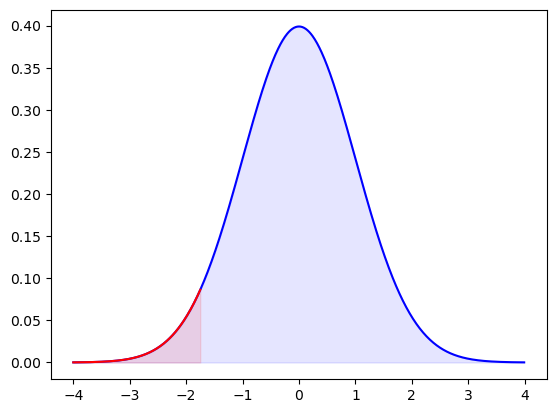

In [349]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)



# The family
* They would like to know if their new design actually improved their conversion rate.


## Step 1 - Import Libraries

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Import dataset

In [351]:
df = pd.read_csv("./assets/Python/The_Family_test_conversions.csv")
df.head()

,Unnamed: 0,Design,Conversion
0,0,B,0
1,1,B,0
2,2,A,1
3,3,A,0
4,4,B,0


In [352]:
df = df.drop(df.columns[[0]], axis=1) 
df.head()

,Design,Conversion
0,B,0
1,B,0
2,A,1
3,A,0
4,B,0


## Step 3 - EDA (Exploratory Data Analysis)
 Proportion of conversion for Feature A & B


In [353]:
df.groupby("Design").mean()



,Conversion
Design,
A,0.106061
B,0.088235


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\phili\AppData\Local\Temp\ipykernel_28176\4248717673.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x="Design", y="Conv

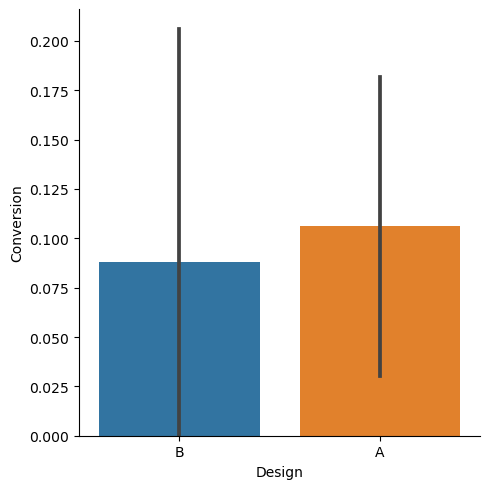

In [354]:
sns.catplot(x="Design", y="Conversion", data=df, kind="bar", ci=95)






## Step 4 - Define hypothesis

In [355]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "The new design improved the conversion rate"
H0 = "Tne new design did not improved the conversion rate"

## Step 5 - Calculate Z-score

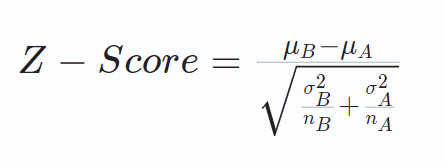


In [356]:
Feature_A = df[df["Design"]=="A"]
Feature_B = df[df["Design"]=="B"]

muA = Feature_A.Conversion.mean()
muB = Feature_B.Conversion.mean()

sigmaA = Feature_A.Conversion.std()
sigmaB = Feature_B.Conversion.std()

nA = len(Feature_A)
nB = len(Feature_B)

denom = sigmaB**2/nB + sigmaA**2/nA
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.03f}\n")

z_score  = -0.286



## Step 6 - Set $\alpha$

Confidence level = 90%

In [357]:
alpha = .10

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

In [358]:
# Bien voir le signe de z_score et la valeur de p_value
# On veut tester si A est significativement plus petit que B
z_score, p_value = ztest(Feature_B.Conversion, Feature_A.Conversion, value = 0, alternative="larger")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

# Voir qu'on a inversé Feature_B et A dans l'appel à ztest et que alternative vaut "larger"
# z_score, p_value = ztest(Feature_A.Converted, Feature_B.Converted, value = 0, alternative="smaller")  
# print(f"z_score  = {z_score:.04f}")
# print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")


z_score  = -0.2787
p_value  = 0.6098

H0 ne peut pas être rejetée. On ne peut pas conclure
Pour rappel H0 = Tne new design did not improved the conversion rate


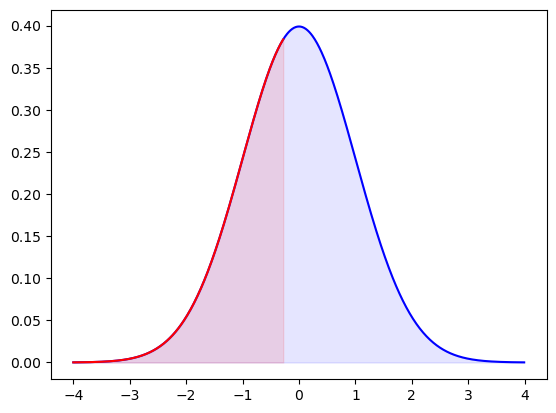

In [359]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)



## Step 9 - Recos

* Increase sample size